# 5. Data Analysis: Waiting Time Model and Visualization of Crimes on Map
- The following Jupyter Notebook takes the cleaned data sets **same_day_emails.csv** and **crimes_final_dataframe_part1.csv** and has a few visualizations that provide some more insight about where crimes occur more frequently, and a potential trend in the waiting time for a WarnMe email to be sent out since the crime occurrence (for same day emails)


In [2]:
import folium as fol
from folium.plugins import HeatMap
import pandas as pd
import matplotlib as plot

import numpy as np
import seaborn as sns

In [3]:
same_day_emails_df = pd.read_csv('same_day_emails.csv').drop(['Unnamed: 0'], axis=1)
crimes_final_df = pd.read_csv('crimes_final_dataframe_part1.csv').drop(['Unnamed: 0'], axis=1)
same_day_emails_df

,Subject,Body,date of crime,time of crime,email time,email day of week,email date,crime location,crime latitude,crime longitude,crime day of week,total difference (in minutes)
0,Burglary at University Village: Albany (UVA),<https://oem.berkeley.edu/sites/default/files...,06-17-2021,02:09,04:02,Thursday,06-17-2021,University Village,37.885668,-122.300929,Thursday,113
1,"Arson Reported at 2650 Haste St., Berkeley CA ...",<https://oem.berkeley.edu/sites/default/files...,06-16-2021,05:20,10:10,Wednesday,06-16-2021,2650 Haste S,37.866656,-122.254336,Wednesday,290
2,Violent Crime Reported at 3100 Block of Dwight...,<https://oem.berkeley.edu/sites/default/files...,06-08-2021,13:15,16:51,Tuesday,06-08-2021,on the 3100 Block of Dwight Way,37.866104,-122.249306,Tuesday,216
3,Violent Crime Reported at Channing Way/ Colleg...,<https://oem.berkeley.edu/sites/default/files...,05-18-2021,15:50,23:23,Tuesday,05-18-2021,Channing Way/ College Ave,37.867508,-122.254250,Tuesday,453
4,Burglary at Clark Kerr Campus building 23,<https://oem.berkeley.edu/sites/default/files...,07-01-2021,18:07,19:32,Thursday,07-01-2021,Clark Kerr Campus building 23,37.864847,-122.247879,Thursday,85
...,...,...,...,...,...,...,...,...,...,...,...,...
141,Sproul Plaza - Violent Crime Reported - Pleas...,<https://oem.berkeley.edu/sites/default/files...,10-25-2023,13:30,14:14,Wednesday,10-25-2023,Sproul Plaz,37.869693,-122.259332,Wednesday,44
142,Burglary at 1050 San Pablo Ave,<https://oem.berkeley.edu/sites/default/files...,09-21-2023,11:31,18:11,Thursday,09-21-2023,1050 San Pablo Ave,37.886421,-122.298131,Thursday,400
143,Stuart Street & Hillegas Ave - Violent Crime ...,<https://oem.berkeley.edu/sites/default/files...,09-07-2023,12:17,13:49,Thursday,09-07-2023,Stuart Stree,37.859870,-122.255850,Thursday,92
144,Singletrack trail east of the Botanical Garden...,<https://oem.berkeley.edu/sites/default/files...,08-20-2023,13:45,16:17,Sunday,08-20-2023,Singletrack trail east of the Botanical Garden...,37.879508,-122.236161,Sunday,152


0.9335043234030704 0.9999999999999998 178.49313585028733


<Axes: xlabel='minutes', ylabel='freq'>

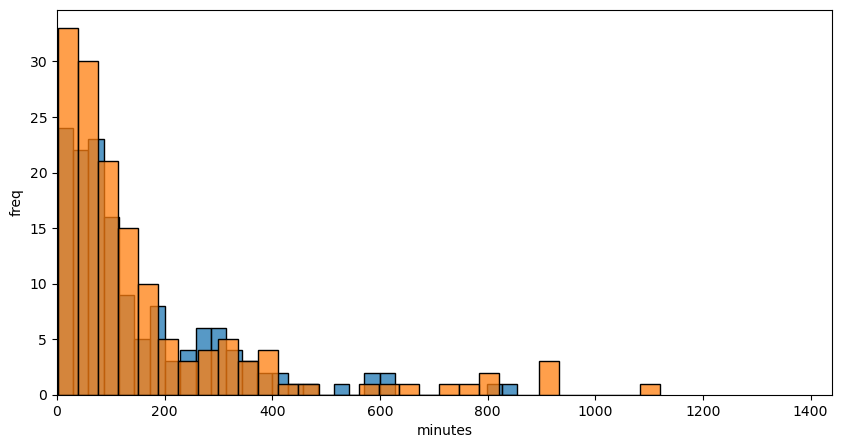

In [4]:
difference = same_day_emails_df['total difference (in minutes)']
# same_day_emails.iloc[130] # change crime date to 05-03-2022..
# same_day_emails.iloc[36] # change crime date to 03-20-2022...
hullo = difference.to_list()
#np.mean((hullo)), np.std((hullo))**2
#np.percentile(hullo, 80)


import scipy.stats as stats
import matplotlib.pyplot as plt


# Scale parameter of ~ 1
blah = []
for i in hullo:
    blah = np.append(blah, i/164)

fit_alpha, fit_loc, fit_beta = stats.gamma.fit(hullo)
print(fit_alpha, fit_loc, fit_beta)

# r = alpha, lamba = beta

plt.figure(figsize=(10,5))
plt.xlim(0, 1440)
plt.xlabel('minutes')
plt.ylabel('freq')



# a = 5
sample = stats.gamma.rvs(1, loc=fit_loc , scale=fit_beta, size = 146)

sns.histplot(sample, bins = 30, kde = False)
sns.histplot(hullo, bins = 30, kde = False)
# sns.distplot((hullo),bins=30, kde=False)

# plt.show()
# np.mean(sample)

In [5]:
crimes_final_df[['crime latitude', 'crime longitude']]

,crime latitude,crime longitude
0,37.885668,-122.300929
1,37.866656,-122.254336
2,37.866104,-122.249306
3,37.867508,-122.254250
4,37.864847,-122.247879
...,...,...
172,37.871717,-122.252217
173,37.868045,-122.266886
174,-9999.000000,-9999.000000
175,37.865901,-122.255375


In [6]:
crime_location_df = crimes_final_df[crimes_final_df['crime latitude'] != -9999].reset_index(drop = True)
crime_location_df

#crime_location_df filters out all crimes that don't have a location, which I manually inputted these with coordinates [-9999, -9999]

,Subject,Body,date of crime,time of crime,email time,email day of week,email date,crime location,crime latitude,crime longitude,crime day of week,total difference (in minutes)
0,Burglary at University Village: Albany (UVA),<https://oem.berkeley.edu/sites/default/files...,06-17-2021,02:09,04:02,Thursday,06-17-2021,University Village,37.885668,-122.300929,Thursday,113
1,"Arson Reported at 2650 Haste St., Berkeley CA ...",<https://oem.berkeley.edu/sites/default/files...,06-16-2021,05:20,10:10,Wednesday,06-16-2021,2650 Haste S,37.866656,-122.254336,Wednesday,290
2,Violent Crime Reported at 3100 Block of Dwight...,<https://oem.berkeley.edu/sites/default/files...,06-08-2021,13:15,16:51,Tuesday,06-08-2021,on the 3100 Block of Dwight Way,37.866104,-122.249306,Tuesday,216
3,Violent Crime Reported at Channing Way/ Colleg...,<https://oem.berkeley.edu/sites/default/files...,05-18-2021,15:50,23:23,Tuesday,05-18-2021,Channing Way/ College Ave,37.867508,-122.254250,Tuesday,453
4,Burglary at Clark Kerr Campus building 23,<https://oem.berkeley.edu/sites/default/files...,07-01-2021,18:07,19:32,Thursday,07-01-2021,Clark Kerr Campus building 23,37.864847,-122.247879,Thursday,85
...,...,...,...,...,...,...,...,...,...,...,...,...
170,"Burglary at 2521 Channing Way, Berkeley",<https://oem.berkeley.edu/sites/default/files...,12-09-2022,20:00,16:48,Monday,12-12-2022,"2521 Channing Way, Berkeley",37.867461,-122.257944,Friday,4128
171,Violent Crime Reported at Memorial Stadium - P...,<https://oem.berkeley.edu/sites/default/files...,04-08-2023,17:40,06:25,Tuesday,04-11-2023,Memorial Stadium,37.871717,-122.252217,Saturday,3645
172,Burglary at Banway Building,<https://oem.berkeley.edu/sites/default/files...,11-29-2023,20:05,11:16,Friday,12-01-2023,Banway Building,37.868045,-122.266886,Wednesday,2531
173,"Burglary at Unit 2 - Ehrman Hall, 2650 Haste S...",<https://oem.berkeley.edu/sites/default/files...,07-07-2023,22:00,17:15,Monday,07-10-2023,"Unit 2 - Ehrman Hall, 2650 Haste St, Berkeley",37.865901,-122.255375,Friday,4035


In [7]:
num_rows = crime_location_df.shape[0]
location_arr = []
for i in range(num_rows):
   location_arr.append([crime_location_df.loc[i, 'crime latitude'], crime_location_df.loc[i, 'crime longitude']] )

#location_arr

In [8]:
folium_map = fol.Map(location=[37.871666, -122.272781], zoom_start = 12)
HeatMap(location_arr, overlay=True, fill_opacity=1, radius=10).add_to(folium_map)
folium_map
#crimes_final_df.groupby(by="crime day of week").count()
#crimes_final_df

In [9]:
# tester = crime_location_df[['crime day of week','Body']].groupby(by = "crime day of week").count().reset_index()
# sns.barplot(data = tester, x = 'crime day of week', y = 'Body')

#visualization idea: crime day trend, month trend?, time trend

# time_of_crime_s = crime_location_df[['time of crime']]
# crime_times_list = crime_location_df['time of crime']
# time_int_list = []

# for i in crime_times_list:
#     converted_hour = int(i[0:2])
#     converted_minute = int(i[3:5])/60 # to hours
#     time_in_int = converted_hour + converted_minute
#     time_int_list.append(time_in_int)

# hour_bins = np.arange(0, 25, 1)
# time_of_crime_s['times of crime (decimal)'] = time_int_list
# sns.histplot(time_int_list, bins = hour_bins)

crimes_map = fol.Map(location=[37.871666, -122.272781], zoom_start = 12)
loc_arr_length = range(len(location_arr))
[(fol.Marker(list(location_arr[c]), popup = "crime time: " + crime_location_df.loc[c, 'time of crime'] +'\n hello', 
             tooltip = crime_location_df.loc[c, 'Subject']).add_to(crimes_map)) for c in loc_arr_length]

crimes_map
